# developer: Mohammad mehdi Sahraei


### clone git

[link Bringing-Old-Photos-Back-to-Life](https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life)

In [1]:
!git clone https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life.git

Cloning into 'Bringing-Old-Photos-Back-to-Life'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 509 (delta 3), reused 5 (delta 1), pack-reused 501
Receiving objects: 100% (509/509), 40.90 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (227/227), done.


### downloading and coping other libraries in main folder

In [2]:
%cd /content/Bringing-Old-Photos-Back-to-Life/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd /content/Bringing-Old-Photos-Back-to-Life/Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

%cd /content/Bringing-Old-Photos-Back-to-Life/Face_Detection
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../


%cd /content/Bringing-Old-Photos-Back-to-Life/Face_Enhancement
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/face_checkpoints.zip
!unzip face_checkpoints.zip
%cd ../


%cd /content/Bringing-Old-Photos-Back-to-Life/Global
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/global_checkpoints.zip
!unzip global_checkpoints.zip
%cd ../

/content/Bringing-Old-Photos-Back-to-Life/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 11.80 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/Bringing-Old-Photos-Back-to-Life
/content/Bringing-Old-Photos-Back-to-Life/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 11.80 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/Bringing-Old-Photos-Back-to-Life
/content/Bringing-Old-Photos-Back-to-Life/Face_Detection
--

### installing requirements.txt

In [3]:
!pip install -r /content/Bringing-Old-Photos-Back-to-Life/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 38.9 MB/s 
     |████████████████████████████████| 41 kB 320 kB/s 
     |████████████████████████████████| 509 kB 50.5 MB/s 


### final , run - the project of scrachted images

In [5]:
!python run.py --input_folder /content/Bringing-Old-Photos-Back-to-Life/test_images/old_w_scratch/ --output_folder /content/Bringing-Old-Photos-Back-to-Life/output --GPU 0 --with_scratch

Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/Bringing-Old-Photos-Back-to-Life/test_images/old_w_scratch
processing a.png
processing b.png
processing c.png
processing d.png
You are using NL + Res
Now you are processing a.png
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
2
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 5 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


### showing Before and after photos

In [6]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]
    
    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

a.png


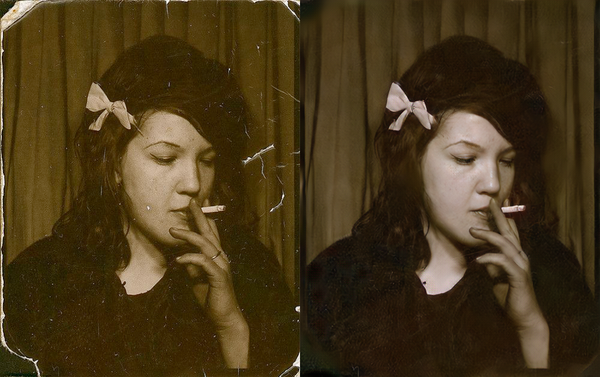

b.png


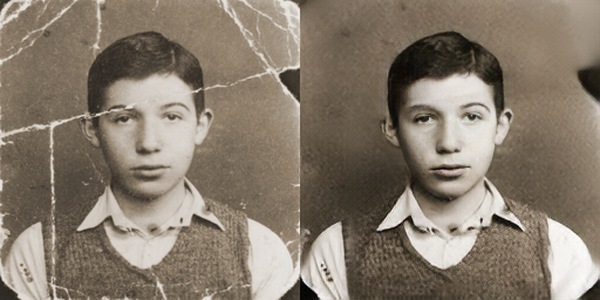

c.png


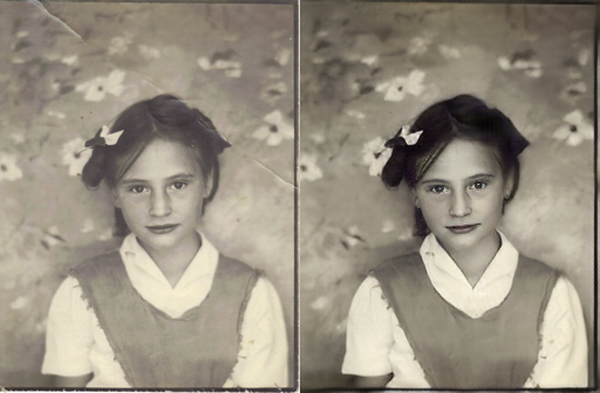

d.png


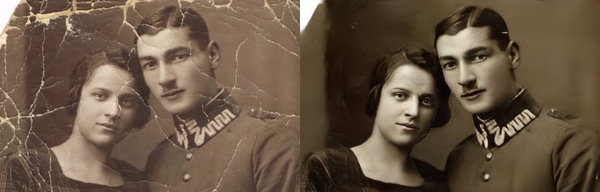

In [11]:
import os

basepath = os.getcwd()
input_folder = "test_images/old_w_scratch"
output_folder = "output"

input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)

filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

In [12]:
#To restore our own photos, it is enough to upload our own photos in the test folder